In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [15]:
# Define constants
synch_phase=-32/180*np.pi
rf_freq_L=201.25e6
rf_freq_H=805e6
proton_mass=938272088.16
electron_mass=510998.95
pmass= proton_mass+2*electron_mass
light_v=299792458

In [16]:
L_energy = [0.75,0.80248,0.85820,0.91708,0.97923,1.04473,1.11367,1.18614,1.26220,1.34194,1.42543,1.51274,1.60393,1.69909,1.79826,1.90152,2.00894,2.12059,2.23463,2.34869,2.46703,2.58974,
         2.71694,2.84871,2.98516,3.12638,3.27246,3.42351,3.57961,3.74088,3.90739,4.07926,4.25658,4.43944,4.62794,4.82218,5.02226,5.22828,5.44033,5.65853,5.88298,6.11377,6.35103,6.59485,
          6.84536,7.10267,7.36691,7.63820,7.91667,8.20247,8.49573,8.79662,9.10529,9.42192,9.74669,10.07979,10.421,
         10.421,10.74471,11.07302,11.40634,11.74462,12.08784,12.43599,12.78901,13.14690,13.50961,13.87711,14.24937,14.62636,15.00804,15.39438,15.78543,16.18108,16.58129,16.98602,
         17.39523,17.80889,18.22695,18.64938,19.07613,19.50717,19.94245,20.38194,20.82560,21.27338,21.72524,22.18114,22.64105,23.10491,23.57269,24.04435,24.51984,24.99913,25.48217,
          25.96892,26.45935,26.95341,27.45106,27.95227,28.45698,28.96518,29.47681,29.99183,30.51022,31.55691,32.08515,32.61660,33.15123,33.6889,34.22986,34.77380,35.32078,35.87076,
          36.42371,36.97961,37.53840,
          37.53840,38.28487,39.03687,39.79378,40.55553,41.32205,42.09325,42.8697,43.64943,44.43426,45.22349,46.01705,46.81486,
          47.61686,48.42296,49.23311,50.04724,50.86526,51.68712,52.51275,53.34207,54.17503,55.01154,55.85156,56.69500,57.54181,
         58.39192,59.24526,60.10178,60.96140,61.82407,62.68972,63.55829,64.42972,65.30395,66.18092,
          66.18092,67.06008,67.94235,68.82717,69.71449,70.60426,71.49642,72.3909,73.28766,74.18664,75.08779,75.99105,76.89636,77.80368,78.71294,79.62411,80.53713,
         81.45194,82.36849,83.28675,84.20665,85.12814,86.05119,86.97574,87.90175,88.82917,89.75794,90.68804,91.61940,92.55200,
          92.552,93.53635,94.52273,95.51059,96.49991,97.49065,98.48278,99.47627,100.47109,101.46721,102.46459,103.46321,104.46303,105.46403,
          106.46618,107.46944,108.47379,109.47919,110.48563,111.49307,112.50148,113.51084,114.52111,115.53228,116.54431
          
         ]
dE_L = []
for i in range(len(L_energy) - 1):
    dE_L.append((L_energy[i+1] - L_energy[i])*1e6)
dE_L.append(0)

In [20]:
# LE dataframe
df = pd.DataFrame(L_energy)
df.columns =['Energy_cell']
df['Energy_cell']=df['Energy_cell']*1e6
df["delE"]=dE_L
df["V"] = df["delE"]/np.cos(synch_phase)
df["Gamma"] = (df["Energy_cell"]+pmass)/pmass
df['Beta']=np.sqrt(1-1/df['Gamma']/df['Gamma'])
df['L']=df['Beta']*light_v/rf_freq_L    ##2pi-mode cavity
df['L2'] = df['L']

In [21]:
def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n, endpoint=False)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles
                                                                                                                                   

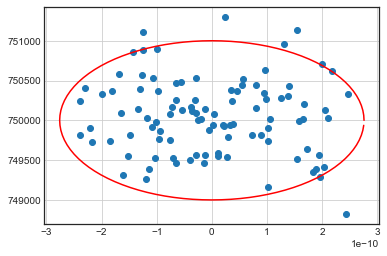

In [29]:
# Generate particles
%matplotlib inline

init_energy = 0.75e6
init_phase = -32

r = [20] #delta phi in degrees, can take multiple entries                                                                                              
rE = [0.001e6] #delta E in MeV, can take multiple                                                                                                        
n = [100] # number of particles on circle, can take multiple                                                                                          
# dE x dPhi x pi
circles = circle_points(r, n)

# Circle
for i,circle in enumerate(circles):
    Ep = np.add(circle[:,1]/(r[i]/rE[i]),init_energy)
    Tp = (np.add(circle[:,0],init_phase) - synch_phase)/360.0/rf_freq

# 2D Gaussian
samples = np.random.multivariate_normal([init_phase, init_energy], [[r[0]**2/4., 1],[1, rE[0]**2/4.]], n[0])
Ep1 = samples[:,1]
Tp1 = np.subtract(samples[:,0],synch_phase)/360./rf_freq

fig, ax = plt.subplots(1,1, sharey=True, sharex=True)
ax.scatter(Tp1,Ep1)
ax.plot(Tp,Ep, color='r')
ax.grid()


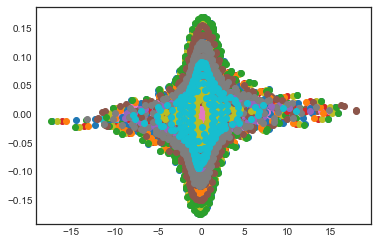

In [30]:
%matplotlib inline 

x = [None]*len(Ep1)
y = [None]*len(Ep1)
l = [None]*len(Ep1)
for i,(E_i,T_i) in enumerate(zip(Ep1,Tp1)):

    x[i] = []
    y[i] = []
    l[i] = []

    #initialize
    total_l=0
    energy = E_i
    T = T_i
    
    T_synch=0
    synch_phase=-32.0
    synch_energy=0.75e6

    for turn in range (0,208):
        voltage=df.iloc[turn,df.columns.get_indexer(['V'])].values[0]
        length=df.iloc[turn,df.columns.get_indexer(['L'])].values[0]
        gamma=(pmass+energy)/pmass
        beta=np.sqrt(1-1/gamma/gamma)
        T_synch=T_synch+1/rf_freq_L # drift
        '''
        # Drift lengths from design
        if turn == 56:
            T_synch=T_synch
        elif turn == 56+59+1:
            T_synch=T_synch
        else:
            T_synch=T_synch
        '''
        T=T+length/(beta*light_v)
        del_phase =(T-T_synch)*rf_freq_L*2*np.pi
        
        energy = energy + voltage*np.cos((synch_phase/180*np.pi)+del_phase)
        synch_energy = synch_energy + voltage*np.cos((synch_phase)/180*np.pi)
        #synch_energy=df.iloc[turn+1,df.columns.get_indexer(['Energy_cell'])].values[0]
        del_energy=energy-synch_energy
        del_phase_deg=del_phase*180/np.pi
        #print(turn,del_phase,del_energy)
        total_l=total_l+length
        x[i].append(del_phase_deg)
        y[i].append(del_energy)
        l[i].append(total_l)
    plt.scatter(x[i],np.divide(y[i],1.e6), label='particle %d'%i)

    
x = np.array(x)
y = np.array(y)
y = np.divide(y,1e6)
l = np.array(l)

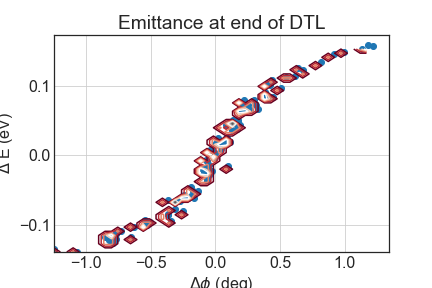

In [33]:
%matplotlib widget

plt.rcParams.update({'font.size': 16})

(counts, x_bins, y_bins) = np.histogram2d(x[:,206], y[:,206],bins=50)
#plt.hist2d(x[:,205], y[:, 205],bins=50,cmap='RdGy')
#plt.contour(counts, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],cmap='RdGy')
plt.contour(x_bins[:-1],y_bins[:-1],counts.T, cmap='RdGy')
plt.scatter(x[:,206],y[:,206]);
plt.title('Emittance at end of DTL')
plt.xlabel('$\Delta \phi$ (deg)')
plt.ylabel('$\Delta$ E (eV)')
plt.grid()

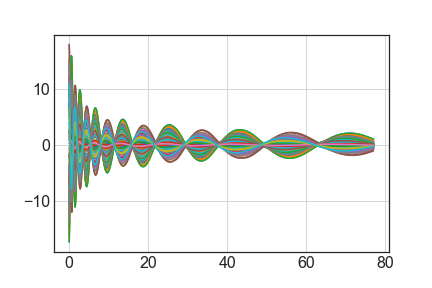

In [32]:
%matplotlib widget
[plt.plot(ll,xx) for (ll,xx) in zip(l,x)]
plt.grid()
plt.show()

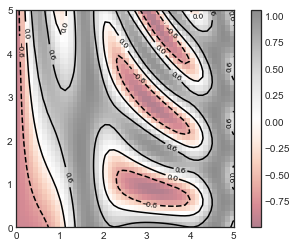

In [237]:
%matplotlib inline
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();
